# Kmeans
## 가상데이터를 클러스터링 하고, 최적의 K를 찾는 2두가지 방법을 실습해봅시다.

### 가상데이터를 생성하고, 시각화로 확인

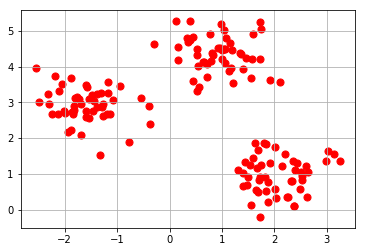

In [9]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)
#n_samples : int, optional (default=100)
#  The total number of points equally divided among clusters.
#n_features : int, optional (default=2)
#  The number of features for each sample.
#centers : int or array of shape [n_centers, n_features], optional(default=3) 
#  The number of centers to generate, or the fixed center locations.
#cluster_std : float or sequence of floats, optional (default=1.0)
#  The standard deviation of the clusters.
#center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
#  The bounding box for each cluster center when centers are generated at random.
#shuffle : boolean, optional (default=True)
#  Shuffle the samples.
#random_state : int, RandomState instance or None, optional (default=None)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c='r', marker='o', s=50)
# c = 칼라 s = 사이즈
plt.grid()
plt.show()

### 가상데이터를 Kmeans를 사용하여 클러스터링 하기

In [12]:
from sklearn.cluster import KMeans
#sklearn의 클러스터에서 KMeans를 임포트합니다
km = KMeans(n_clusters=3, #클러스터 개수
            init='random', # Kmeans++ 혹은 random이 들어갑니다.
            n_init=1000, # 몇번 클러스터의 중심점을 찾을지 정합니다.
            max_iter=300, # 한번 구동에 반복 제한입니다.
            tol=1e-04, # 오차한계를 0.01%로 정한다는 의미입니다.
            random_state=0)# 이것도 랜덤함수의 seed를 정해줍니다.

y_km = km.fit_predict(X)

print(y_km)

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


'auto'

>K-평균++
K-평균 클러스터링은 초기 값을 어떻게 선택 하는가에 성능이 따라 크게 달라지는 성질을 가지고 있다. 2007년 David Arthur와 Sergei Vassilvitskii은 이러한 성질로 인한 피해를 줄이기 위해 K-평균++ 을 제안하였다. K-평균++ 알고리즘은 K-평균 클러스링 알고리즘의 초기 값을 선택하는 알고리즘이다.

>데이터 집합으로부터 임의의 데이터를 하나 선택하여 첫 번째 중심으로 설정한다.
k개의 중심이 선택될 때 까지 다음의 단계를 반복한다.
데이터 집합의 각 데이터에 대해서, 해당 데이터와 선택된 중심점들 중 가장 가까운 중심과의 거리 D(x)를 계산한다.
확률이 D(x)^2에 비례하는 편중 확률 분포를 사용하여 임의의 데이터를 선택한 후, n번째 중심으로 설정한다.
선택된 k개의 중심들을 초기 값으로 하여 K-평균 클러스터링을 수행한다.
K-평균++ 알고리즘은 초기 값을 설정하기 위해 추가적인 시간을 필요로 하지만, 이후 선택된 초기 값은 이후 K-평균 알고리즘이 {\displaystyle O(logk)} {\displaystyle O(logk)}의 시간 동안 최적 K-평균 해를 찾는 것을 보장한다. 일반적으로 데이터 마이닝에서 사용된다.
출처 : https://ko.wikipedia.org/wiki/K-평균_알고리즘 변형 Part




### 클러스터링이 된 데이터를 scatter plot으로 확인

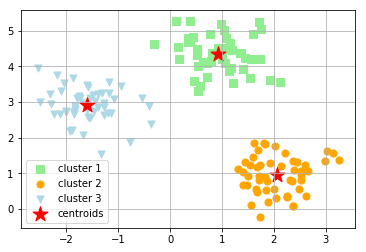

In [5]:
plt.scatter(X[y_km==0,0],
            X[y_km ==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km ==1,0],
            X[y_km ==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km ==2,0],
            X[y_km ==2,1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
# 클러스터별로 색을 다르게 하여 scatter plot을 찍어줍니다.
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
# 각 클러스터의 중심점을 찍어줍니다.
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [6]:
print('Distortion: %.2f' % km.inertia_)
# inertia = 모든 점에서의 각 점의 클러스터 중심점까지의 거리를 합한 숫자입니다. 실수형으로 나옵니다.

Distortion: 72.48


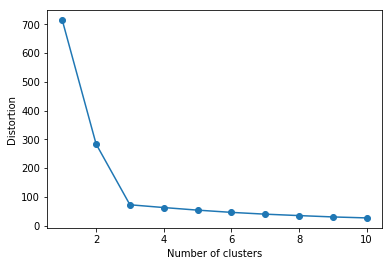

In [7]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
               init='k-means++',
               n_init = 100,
               max_iter = 300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
# 1부터 10까지 클러스터의 개수 즉, K를 주면서 포문을 돌려 inertia를 구하고, 각 클러스터 개수별 inertia를 그래프로 봅니다.
# 이때, 급격히 줄어들던 inertia는 어떠한 K를 기점으로 줄어드는 기울기가 완만해 지는데, 이 점을 elbow라고 부르며 최적의 K로 간주합니다.

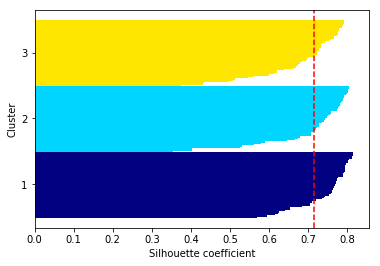

In [10]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
# Kmeans로 Clustering을 해줍니다.

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')
# 각 점에 대해 자신이 속한 집단의 중심점까지의 거리를 A 가장 가까운 집단의 중심점 까지의 거리를 B라고 한다면,
# (B - A) / max(A, B)로 계산되는 수치입니다.
# -1에서 1까지의 값을 가지며, 클수록 좋습니다.
# 각 집단이 얼마나 잘 쪼개어졌는지 확일 할 수 있는 값입니다.
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
# Silhouette이라는 개념을 사용하여, 최적의 K를 찾아보는 방법입니다.
# 각 집단의 실루엣을 0에서 쌓아가면서 모든 집단의 실루엣을 살펴봅니다.

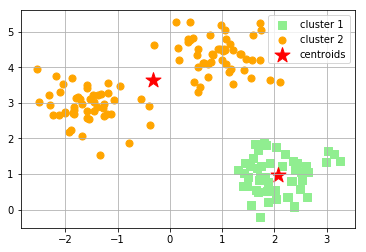

In [11]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=50, c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.show()
# 클러스터가 2개일 때 플롯입니다.

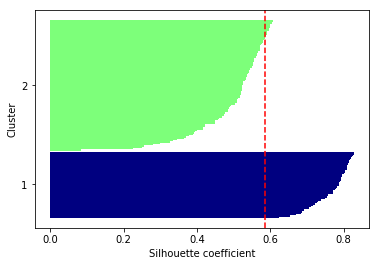

In [12]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()
# 두 집단의 실루엣이 차이가 나는것을 볼 수 있습니다.